# Churn Prediction

---

<br>

### The Data

Our principal data set come from a start up that offers memberships to users access 
online meditation, breathwork and coaching sessions with live professors.

We have a data set of classes taken by user, their plan, their plan type, 
when and if they have cancelled that plan/membership.

<br>

### Attibutes/Features Description

- Class Category: class/session type (Breathwork; Meditation & Breathwork; Meditation, Breathwork & Movement; Body Awereness; Body Intelligence; Mindfulness Design);
- Instructor: who teaches the sessions;
- School Instructor: which instance inside the platform the instructor came from;
- Date: date of the session;
- Time: time of each session;
- Duration: duration of the session;
- Language: language which the session is given;
- Name: Name of the user/member/student;
- Phone Number: of the user (empty);
- Status: shows if the user took the class (NO_SHOW; PRESENT; CANCELED);
- Plan Type:  Free == 1; Freemium (used for trial) == 2; Paid == 3;
- Currency: BRL, USD, EUR, GBP;
- Cancelled Date: dd/mm/yyyy if the user has cancelled the membership, NA if they are still active;
- Churn: 0 (no); 1 (yes).

<br>

### Goal / Target

Try to predict churn by using as a basis the user behavior of taking classes.
<br>
</br>

### Tools

Python, Numpy, Pandas, Matplotlib, SeaBorn and Scikitlearn
<br>
</br>

---




<br>

### Step 1: Preparing the Data
<br>



In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# loading data set

df = pd.read_excel('Report_Class_Booking_Presence.xlsx', sheet_name='ClassBook')
df.head()

,Class Category,Instructor,Date,Time,Duration,Language,Name,Phone Number,Status,Plan Type,Currency,Cancelled Date,Churn
0,Meditation & Breathwork,RPoi,2022-07-10,11:00:00,30,Portuguese - Br,TAla,NaN,NO_SHOW,Freemium,BRL,NaT,0
1,Meditation & Breathwork,RPoi,2022-07-02,10:30:00,30,Portuguese - Br,CAlo,NaN,PRESENT,Paid,BRL,NaT,0
2,"Meditation, Breathwork & Movement",JdeMe,2022-08-19,07:00:00,60,Portuguese - Br,ERoa,NaN,NO_SHOW,Paid,BRL,NaT,0
3,"Meditation, Breathwork & Movement",STes,2022-09-10,12:30:00,50,English UK,JvanH,NaN,NO_SHOW,Freemium,USD,NaT,0
4,Meditation & Breathwork,LDee,2022-01-03,19:30:00,30,Portuguese - Br,MBlh,NaN,NO_SHOW,Paid,BRL,NaT,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11732 entries, 0 to 11731
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Class Category  11732 non-null  object        
 1   Instructor      11732 non-null  object        
 2   Date            11732 non-null  datetime64[ns]
 3   Time            11732 non-null  object        
 4   Duration        11732 non-null  int64         
 5   Language        11732 non-null  object        
 6   Name            11732 non-null  object        
 7   Phone Number    0 non-null      float64       
 8   Status          11732 non-null  object        
 9   Plan Type       11654 non-null  object        
 10  Currency        11654 non-null  object        
 11  Cancelled Date  1330 non-null   datetime64[ns]
 12  Churn           11732 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 1.2+ MB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11732 entries, 0 to 11731
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Class Category  11732 non-null  object        
 1   Instructor      11732 non-null  object        
 2   Date            11732 non-null  datetime64[ns]
 3   Time            11732 non-null  object        
 4   Duration        11732 non-null  int64         
 5   Language        11732 non-null  object        
 6   Name            11732 non-null  object        
 7   Phone Number    0 non-null      float64       
 8   Status          11732 non-null  object        
 9   Plan Type       11654 non-null  object        
 10  Currency        11654 non-null  object        
 11  Cancelled Date  1330 non-null   datetime64[ns]
 12  Churn           11732 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 1.2+ MB


---

### Step 2: EDA - Exploratory Data Analysis
<br>


<AxesSubplot: xlabel='Status', ylabel='Churn'>

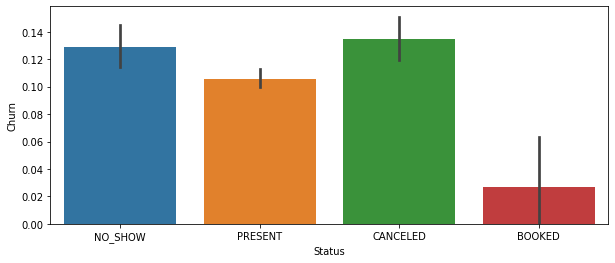

In [5]:
# how 'Status' is correlated with 'Churn'. We can see that people who do the sessions has lower churn.

plt.figure(figsize=(10,4))
sns.barplot(df, x='Status', y='Churn')

<AxesSubplot: xlabel='Plan Type', ylabel='Churn'>

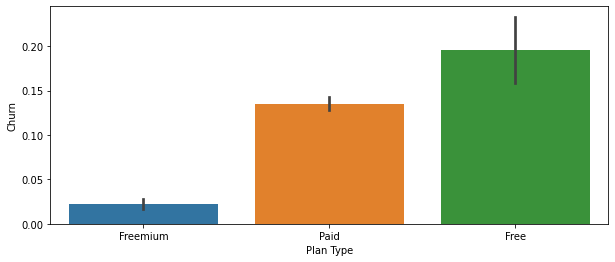

In [6]:
#  how 'Plan Type' is correlated with 'Churn'. 

plt.figure(figsize=(10,4))
sns.barplot(df, x='Plan Type', y='Churn')

<AxesSubplot: xlabel='Churn', ylabel='count'>

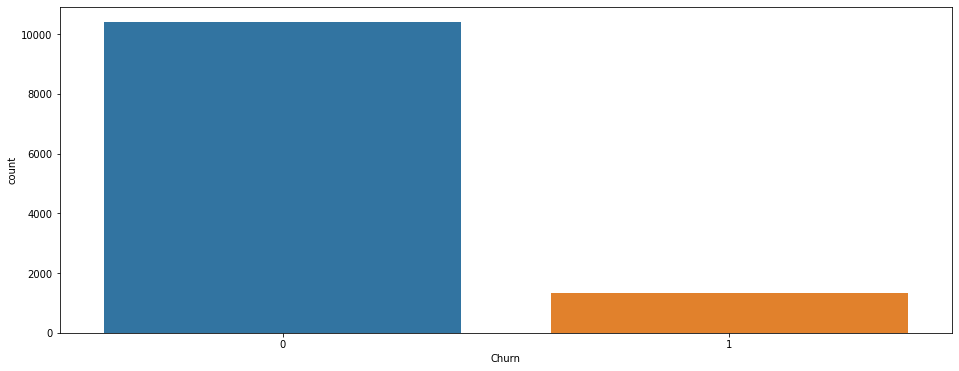

In [7]:
# counting evasions(churn) vs. active users

plt.figure(figsize=(16,6))
sns.countplot(df, x='Churn')

In [8]:
# transforming categorical variables to numerical variables

df = pd.get_dummies(df, columns=['Currency', 'Language', 'Plan Type', 'Class Category', 'Status'])
df.head()

,Instructor,Date,Time,Duration,Name,Phone Number,Cancelled Date,Churn,Currency_BRL,Currency_CLP,...,"Class Category_Meditation, Breathwork & Movement",Class Category_Mindfulness Design,Class Category_Others,Class Category_Practice for Teachers,Class Category_Special Classes,Class Category_Theoretical classes,Status_BOOKED,Status_CANCELED,Status_NO_SHOW,Status_PRESENT
0,RPoi,2022-07-10,11:00:00,30,TAla,NaN,NaT,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,RPoi,2022-07-02,10:30:00,30,CAlo,NaN,NaT,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,JdeMe,2022-08-19,07:00:00,60,ERoa,NaN,NaT,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,STes,2022-09-10,12:30:00,50,JvanH,NaN,NaT,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,LDee,2022-01-03,19:30:00,30,MBlh,NaN,NaT,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# pivot table to sum attendance status (and other features) grouping by user

df_pivoted = pd.pivot_table(df, index=['Name'], aggfunc=np.sum)
df_pivoted.head()

C:\Users\User\AppData\Local\Temp\ipykernel_17252\1639619512.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pivoted = pd.pivot_table(df, index=['Name'], aggfunc=np.sum)


,Churn,Class Category_Body Awareness,Class Category_Body Intelligence,Class Category_Breathwork,Class Category_JARDINS CLASSES,Class Category_Meditation & Breathwork,"Class Category_Meditation, Breathwork & Movement",Class Category_Mindfulness Design,Class Category_Others,Class Category_Practice for Teachers,...,Language_Portuguese - Pt,Language_Spanish,Phone Number,Plan Type_Free,Plan Type_Freemium,Plan Type_Paid,Status_BOOKED,Status_CANCELED,Status_NO_SHOW,Status_PRESENT
Name,,,,,,,,,,,,,,,,,,,,,
A,0,1,3,20,0,44,29,25,1,0,...,1,2,0.0,6,60,66,0,19,35,78
AAlaF,0,1,1,19,0,44,31,10,0,0,...,8,18,0.0,0,8,98,0,9,2,95
AAnsR,0,0,0,0,0,0,1,0,0,0,...,0,0,0.0,0,1,0,0,0,0,1
AAraL,0,0,0,2,0,2,0,0,0,0,...,0,0,0.0,0,4,0,0,1,3,0
AAuad,0,0,0,0,0,0,1,0,0,0,...,0,0,0.0,0,1,0,0,0,1,0


In [10]:
# adding a column with No Churn = 0 and Yes Churn = 1

df_pivoted['Churn'] = np.where(df_pivoted['Churn'] != 0, 1, 0)
df_pivoted.head()

,Churn,Class Category_Body Awareness,Class Category_Body Intelligence,Class Category_Breathwork,Class Category_JARDINS CLASSES,Class Category_Meditation & Breathwork,"Class Category_Meditation, Breathwork & Movement",Class Category_Mindfulness Design,Class Category_Others,Class Category_Practice for Teachers,...,Language_Portuguese - Pt,Language_Spanish,Phone Number,Plan Type_Free,Plan Type_Freemium,Plan Type_Paid,Status_BOOKED,Status_CANCELED,Status_NO_SHOW,Status_PRESENT
Name,,,,,,,,,,,,,,,,,,,,,
A,0,1,3,20,0,44,29,25,1,0,...,1,2,0.0,6,60,66,0,19,35,78
AAlaF,0,1,1,19,0,44,31,10,0,0,...,8,18,0.0,0,8,98,0,9,2,95
AAnsR,0,0,0,0,0,0,1,0,0,0,...,0,0,0.0,0,1,0,0,0,0,1
AAraL,0,0,0,2,0,2,0,0,0,0,...,0,0,0.0,0,4,0,0,1,3,0
AAuad,0,0,0,0,0,0,1,0,0,0,...,0,0,0.0,0,1,0,0,0,1,0


<AxesSubplot: >

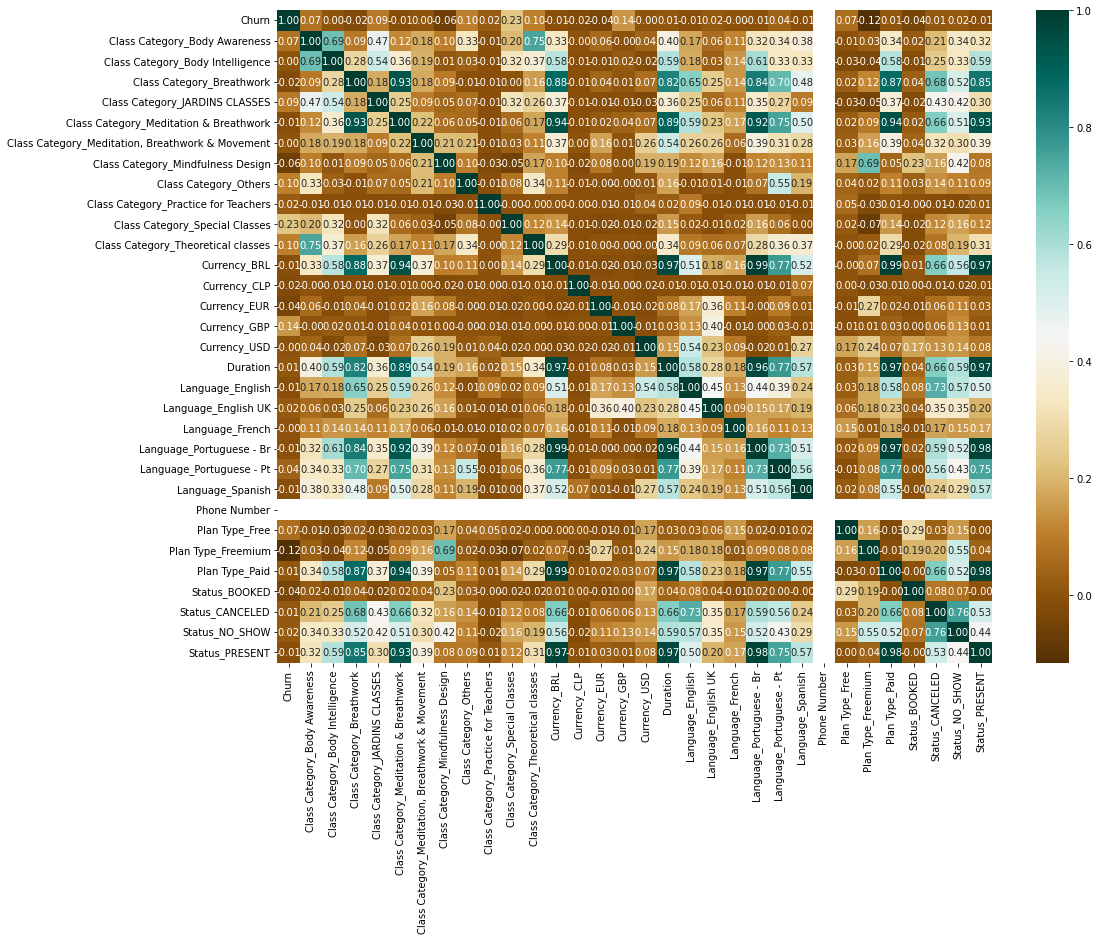

In [11]:
# checking correlations

df2 = df_pivoted

plt.figure(figsize=(16,12))
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='BrBG')

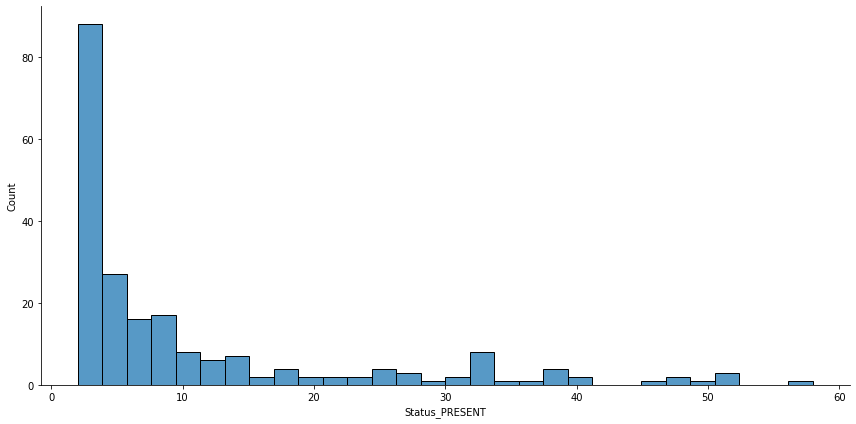

In [12]:
# counting Status_PRESENT without outliers (how many sessions each user took)

df3 = df2[df2.Status_PRESENT < 61]
df4 = df3[df3.Status_PRESENT > 1]
sns.displot(df4['Status_PRESENT'].dropna() ,bins=30, height=6, aspect=12/6)

<AxesSubplot: xlabel='Churn', ylabel='Status_PRESENT'>

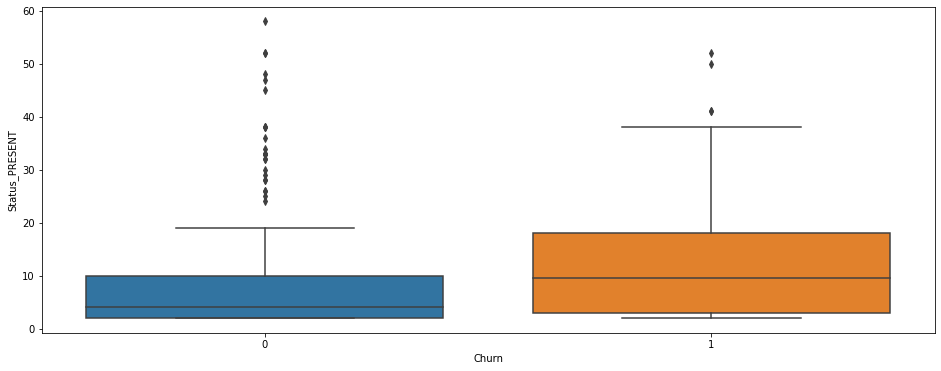

In [13]:
# comparing churn by number of sessions made by each user

plt.figure(figsize=(16,6))
sns.boxplot(data=df4, x='Churn', y='Status_PRESENT')

# users with positive churn has more diffuse number of attandance

In [14]:
# average attendance

print(df4['Status_PRESENT'].loc[(df4['Churn'] == 0)].mean())
print('<------>')
print(df4['Status_PRESENT'].loc[(df4['Churn'] == 1)].mean())

9.820359281437126
<------>
13.770833333333334


In [15]:
# churn by teacher

df_instr = pd.pivot_table(df, index=['Instructor'], aggfunc=np.sum)
df_instr.head()

C:\Users\User\AppData\Local\Temp\ipykernel_17252\1384420887.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_instr = pd.pivot_table(df, index=['Instructor'], aggfunc=np.sum)


,Churn,Class Category_Body Awareness,Class Category_Body Intelligence,Class Category_Breathwork,Class Category_JARDINS CLASSES,Class Category_Meditation & Breathwork,"Class Category_Meditation, Breathwork & Movement",Class Category_Mindfulness Design,Class Category_Others,Class Category_Practice for Teachers,...,Language_Portuguese - Pt,Language_Spanish,Phone Number,Plan Type_Free,Plan Type_Freemium,Plan Type_Paid,Status_BOOKED,Status_CANCELED,Status_NO_SHOW,Status_PRESENT
Instructor,,,,,,,,,,,,,,,,,,,,,
AAni,6,0,0,0,0,42,11,0,0,0,...,0,0,0.0,4,17,32,2,12,14,25
ACaDa,10,0,0,0,0,46,0,0,0,0,...,0,0,0.0,2,10,34,1,5,8,32
ACaGa,35,76,268,0,0,28,31,0,0,0,...,0,0,0.0,7,1,395,0,27,19,357
AClMa,6,0,0,0,0,81,7,0,0,0,...,0,0,0.0,2,15,71,1,15,13,59
ADar,60,0,0,0,0,671,34,29,0,0,...,0,0,0.0,35,104,595,1,65,75,593


In [16]:
churn_by = df_instr[['Churn']].sort_values('Churn', ascending=False)
churn_by.head(20)


,Churn
Instructor,
LDee,113
RSas,89
HRua,74
PDee,74
ADar,60
JChl,59
LCrSa,41
JThn,37
ACaGa,35


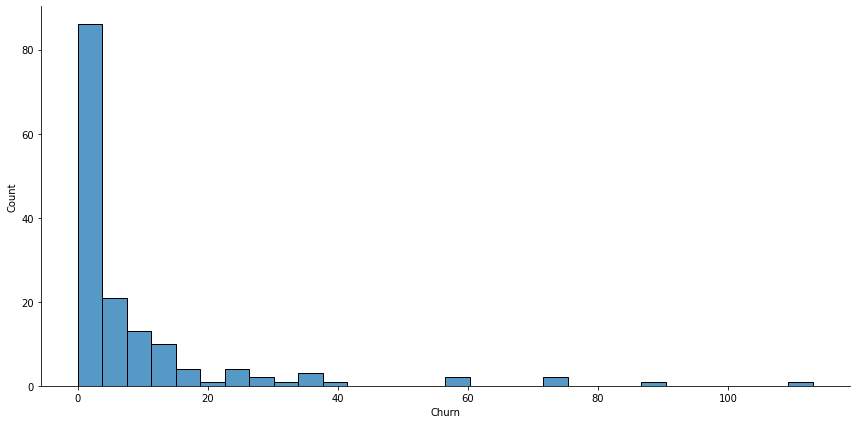

In [17]:
sns.displot(churn_by, x='Churn', bins=30, height=6, aspect=12/6)

In [18]:
# churn by instructor

plt.figure(figsize=(12,6))
px.histogram(churn_by, x='Churn')

<Figure size 864x432 with 0 Axes>

In [19]:
# importing other attendance data, just about Paid Users by Month

df_new = pd.read_excel('Report_Class_Booking_Presence.xlsx', sheet_name='Attendance Paid Users')
df_new.head()

,Name,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,Total,Churn Date,Churn
0,aesa,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,4,NaT,0
1,AMoa,10.0,8.0,11.0,16.0,10.0,9.0,8.0,9.0,7.0,5.0,2.0,NaN,95,NaT,0
2,ASAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,18.0,1.0,26,NaT,0
3,Acaa,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,2022-11-01,1
4,ACaaP,2.0,1.0,NaN,NaN,NaN,NaN,3.0,4.0,3.0,3.0,2.0,NaN,18,NaT,0


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        145 non-null    object        
 1   jan         61 non-null     float64       
 2   fev         58 non-null     float64       
 3   mar         63 non-null     float64       
 4   abr         56 non-null     float64       
 5   mai         54 non-null     float64       
 6   jun         57 non-null     float64       
 7   jul         66 non-null     float64       
 8   ago         46 non-null     float64       
 9   set         51 non-null     float64       
 10  out         49 non-null     float64       
 11  nov         54 non-null     float64       
 12  dez         17 non-null     float64       
 13  Total       145 non-null    int64         
 14  Churn Date  53 non-null     datetime64[ns]
 15  Churn       145 non-null    int64         
dtypes: datetime64[ns](1), floa

<AxesSubplot: >

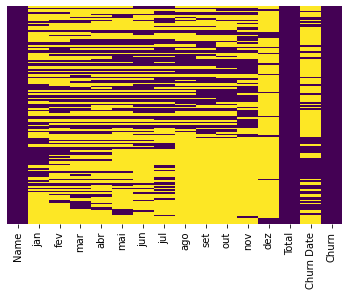

In [21]:
# missing data 'NaN'

sns.heatmap(df_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
df_new = df_new.fillna(0)
df_new.head()

,Name,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,Total,Churn Date,Churn
0,aesa,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,4,0,0
1,AMoa,10.0,8.0,11.0,16.0,10.0,9.0,8.0,9.0,7.0,5.0,2.0,0.0,95,0,0
2,ASAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,18.0,1.0,26,0,0
3,Acaa,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2,2022-11-01 00:00:00,1
4,ACaaP,2.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,3.0,3.0,2.0,0.0,18,0,0


<AxesSubplot: >

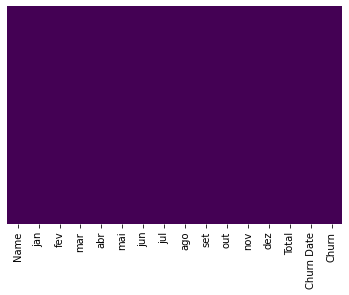

In [23]:
sns.heatmap(df_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
# removing outliers

df_new = df_new[df_new.Total < 200]

<AxesSubplot: >

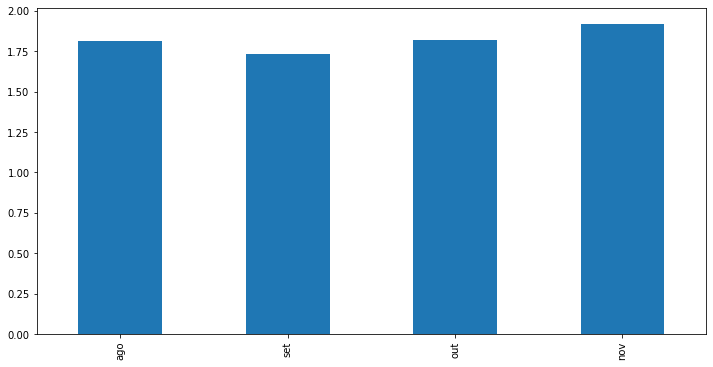

In [25]:
# avg. attendance by month (Paid Users)

cols = ['ago', 'set', 'out', 'nov']

plt.figure(figsize=(12,6))
df_new[cols].mean().plot(kind='bar')

In [26]:
df_new['Average'] = df_new[cols].mean(axis=1)
df_new.head()

,Name,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,Total,Churn Date,Churn,Average
0,aesa,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0.00
1,AMoa,10.0,8.0,11.0,16.0,10.0,9.0,8.0,9.0,7.0,5.0,2.0,0.0,95,0,0,5.75
2,ASAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,18.0,1.0,26,0,0,6.25
3,Acaa,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2,2022-11-01 00:00:00,1,0.00
4,ACaaP,2.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,3.0,3.0,2.0,0.0,18,0,0,3.00


<AxesSubplot: xlabel='Churn', ylabel='Average'>

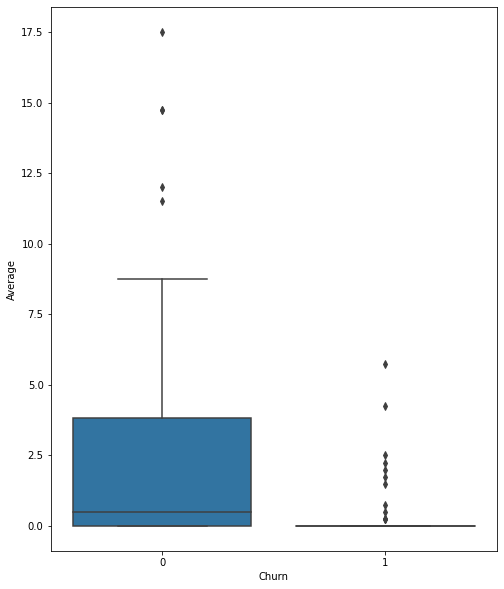

In [27]:
# attendance by churn

plt.figure(figsize=(8,10))
sns.boxplot(data=df_new, x='Churn', y='Average')

In [28]:
# average attendance of paid users

print(df_new['Average'].loc[(df_new['Churn'] == 0)].mean())
print('<--->')
print(df_new['Average'].loc[(df_new['Churn'] == 1)].mean())

2.705357142857143
<--->
0.41509433962264153




<br></br>

### EDA Conclusion: 

Since we want to predict churn, observing the heatmap
we cannot see clearly correlations between any actual features on the general data set.

With the second data frame we can clearly see that user who have canceled their membership has took less sessions (avg. of 0.41) and who 'stay' did more sessiones (avg. of 2.70)

We are asumming that if a user do at least sessions it engenders loyalty.

<p>We should collect data about others things (posible new quality features) to improve future analysis. 
<p> Ex.: 

- Who didn't even booked any session?
- Did the user took the assessment?
- Made the personalized follow-up?
- How many times did the user enter the platform?
- Overdue Payment?
- With who the user did the sessions?
- Quality of the transmission.

</p>
<br></br>

---

<br></br>


### Step 3: Prediction

<p>Let's try to do some predictions using attendance that is the only feature that shows some correlation with churn.</p>

<p>We are going to test the predictions using the first data set (with all attendances) and then the second data set (with just the paid users attendance)



<br></br>

In [29]:
pred = df_new.drop(['Name', 'Churn Date'], axis=1)

In [30]:
# train test split

from sklearn.model_selection import train_test_split

In [31]:
X = pred.drop('Churn',axis=1)
y = pred['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101, stratify=y) # using stratify to a unbalanced db

<AxesSubplot: >

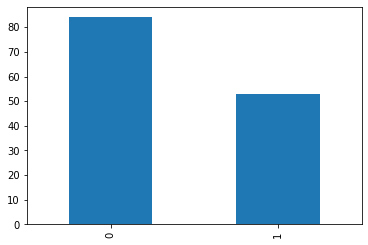

In [32]:
# balanced data set

y.value_counts().plot.bar()

In [33]:
# % of each class

y.value_counts()

0    84
1    53
Name: Churn, dtype: int64

In [34]:
# % of each class

(y.value_counts()/y.shape[0])*100

0    61.313869
1    38.686131
Name: Churn, dtype: float64

### Decision Tree

In [35]:
#training data using DECISION TREE

from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
# predicting

predictions = dtree.predict(X_test)

In [39]:
# evaluating the model

from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(confusion_matrix(y_test,predictions))
print('<------>')
print(classification_report(y_test,predictions))

[[17  9]
 [ 2 14]]
<------>
              precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.61      0.88      0.72        16

    accuracy                           0.74        42
   macro avg       0.75      0.76      0.74        42
weighted avg       0.79      0.74      0.74        42



### Random Forest

In [41]:
#training data using RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier(n_estimators=100)

In [43]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
# predicting

predictions2 = rf.predict(X_test)

In [45]:
# evaluating the model

print(confusion_matrix(y_test,predictions2))
print('<------>')
print(classification_report(y_test,predictions2))

[[18  8]
 [ 3 13]]
<------>
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.62      0.81      0.70        16

    accuracy                           0.74        42
   macro avg       0.74      0.75      0.73        42
weighted avg       0.77      0.74      0.74        42



### Doing it again using the fisrt data set (more complete)

In [46]:
X = df4.drop('Churn',axis=1)
y = df4['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [47]:
rf = RandomForestClassifier(n_estimators=100)

In [48]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
predictions3 = rf.predict(X_test)

In [50]:
print(confusion_matrix(y_test,predictions3))
print('<------>')
print(classification_report(y_test,predictions3))

[[46  2]
 [12  5]]
<------>
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        48
           1       0.71      0.29      0.42        17

    accuracy                           0.78        65
   macro avg       0.75      0.63      0.64        65
weighted avg       0.77      0.78      0.75        65



### Oversampling unbalanced data

In [51]:
# balancing minority data

from imblearn.over_sampling import RandomOverSampler

In [52]:
ros = RandomOverSampler(random_state=42)

In [53]:
X_res, y_res = ros.fit_resample(X_train, y_train)

<AxesSubplot: >

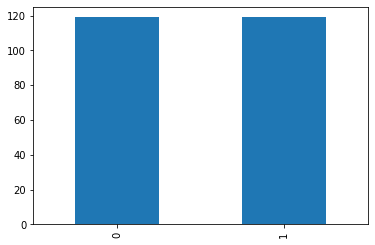

In [54]:
y_res.value_counts().plot.bar()

In [55]:
y_res.value_counts()

0    119
1    119
Name: Churn, dtype: int64

In [56]:
# classifying again

rf = RandomForestClassifier(n_estimators=100)

In [57]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
predictions4 = rf.predict(X_test)

In [59]:
print(confusion_matrix(y_test,predictions4))
print('<------>')
print(classification_report(y_test,predictions4))

[[46  2]
 [12  5]]
<------>
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        48
           1       0.71      0.29      0.42        17

    accuracy                           0.78        65
   macro avg       0.75      0.63      0.64        65
weighted avg       0.77      0.78      0.75        65

